In [12]:
import numpy as np
import torch.nn as nn
from my_dataset import MyDataset 
from voting_model import MyVoter, MyTrainedModel, MyNN, MyLinear
import matplotlib.pyplot  as plt

In [ ]:
train_filepath = "my_data/superfeatures1/train.csv"
test_filepath = "my_data/superfeatures1/test.csv"

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1)
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_y = train_data[:, -1].astype(int)
test_y = test_data[:, -1].astype(int)

train_X1 = train_data[:, :-1]
test_X1  = test_data[:, :-1]

# train_X2 = train_data[:, 320:-1]
# test_X2 = test_data[:, 320:-1]

# train_X3 = train_data[:, 320:-321]
# test_X3 = test_data[:, 320:-321]

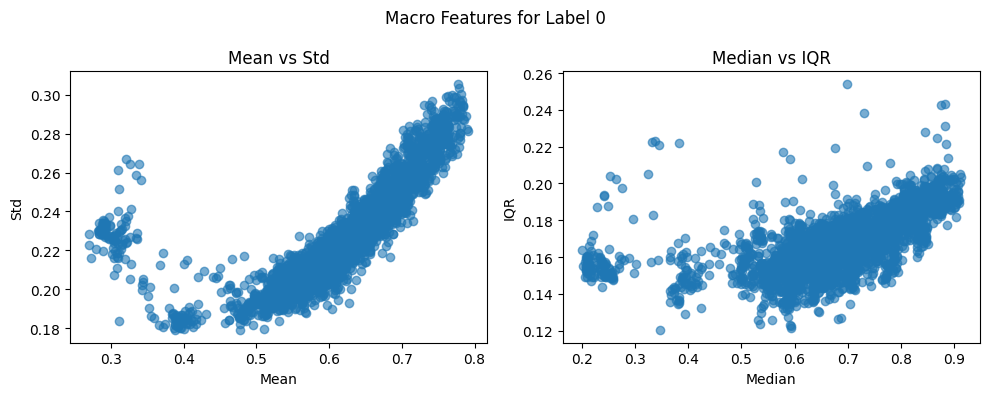

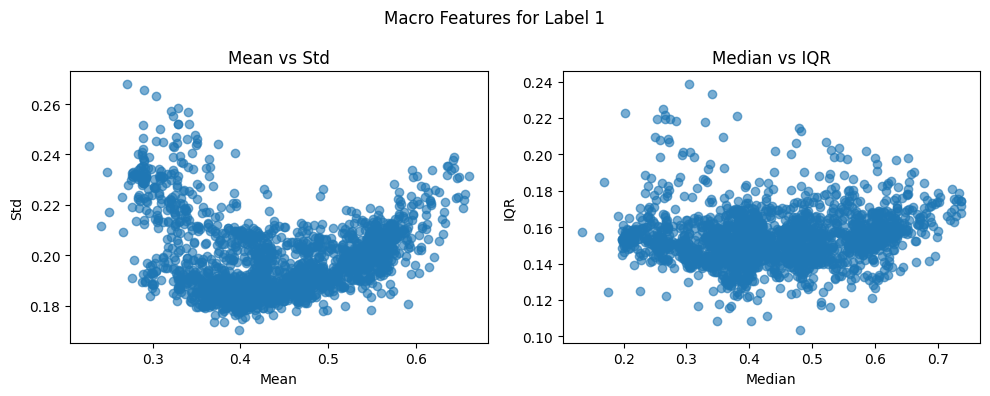

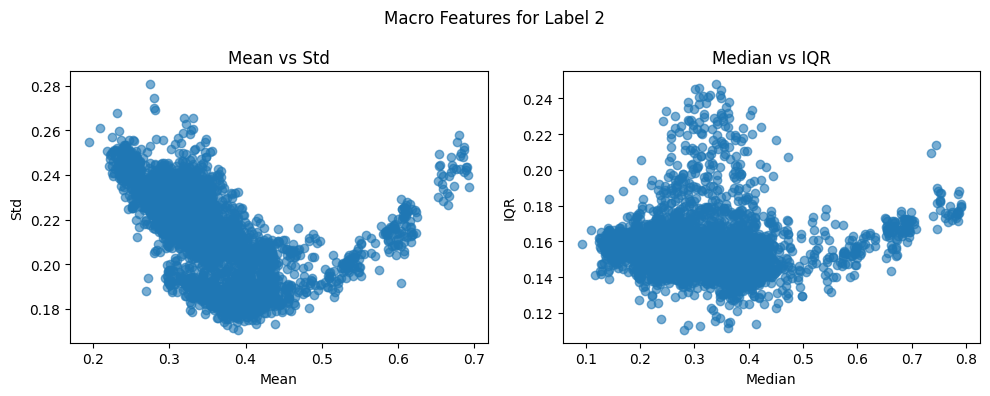

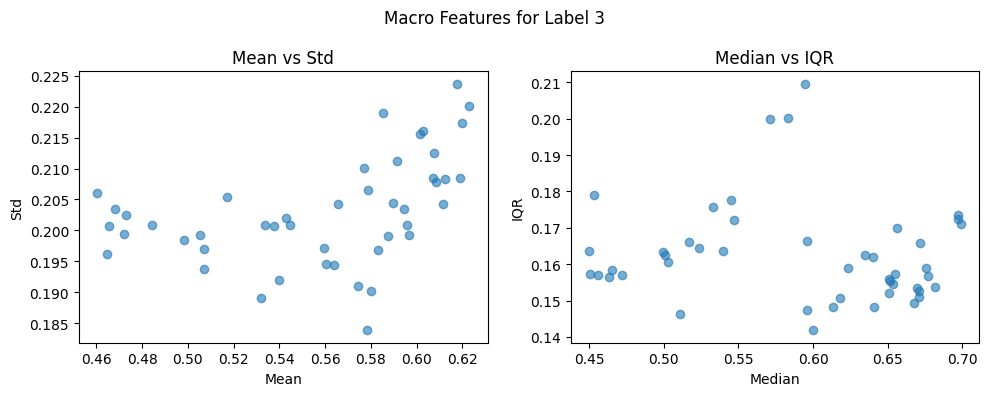

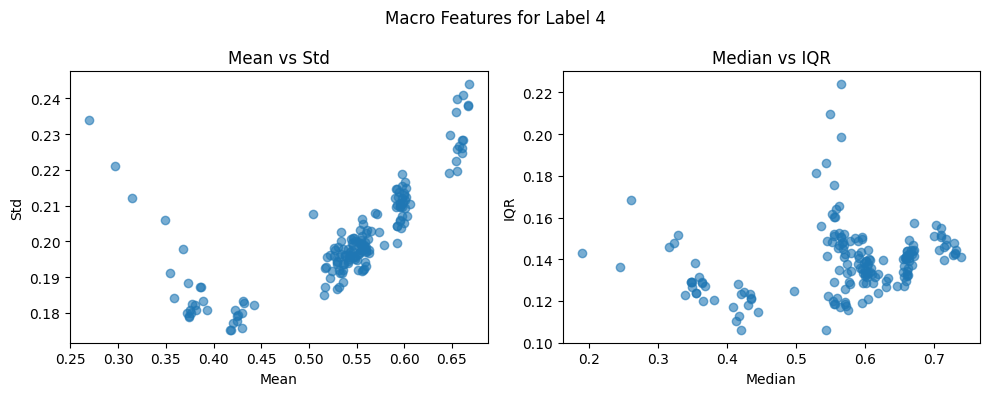

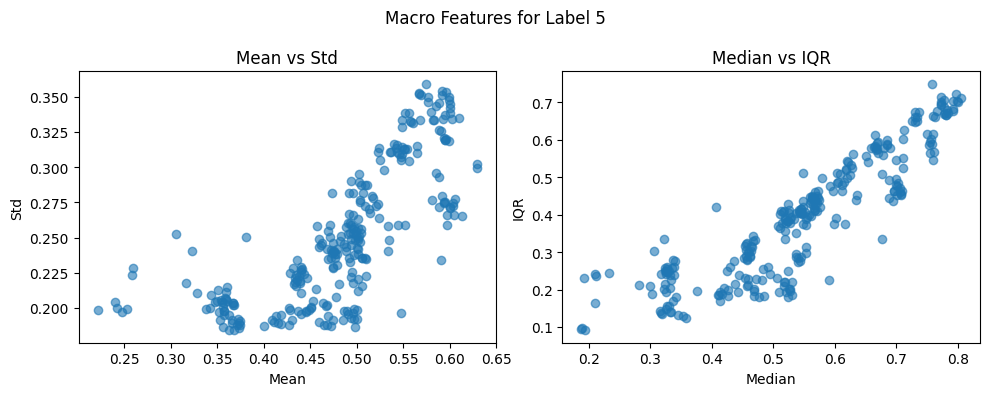

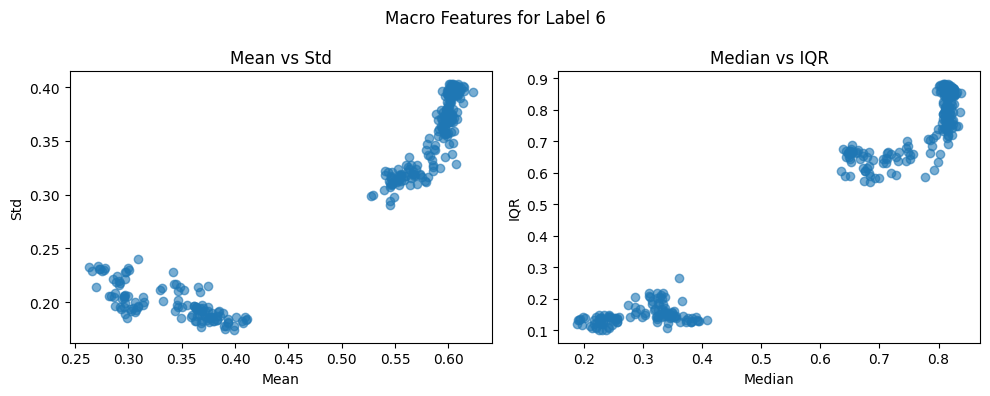

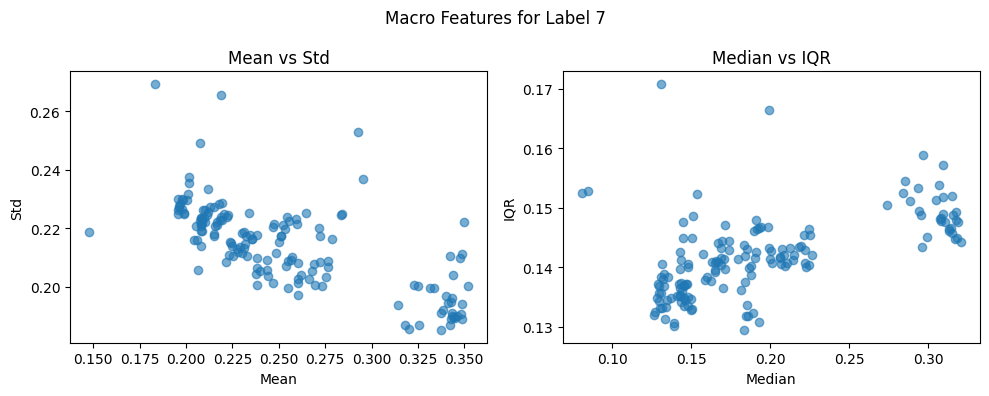

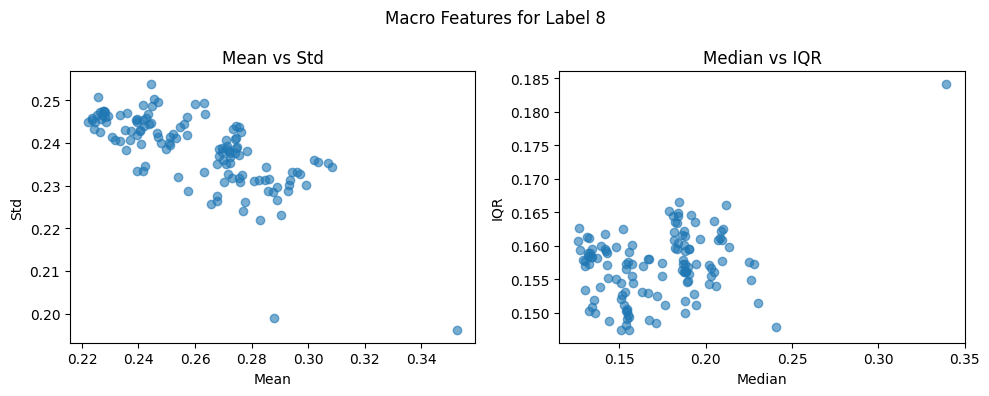

In [ ]:

ordered_labels_idx = np.argsort(train_y)
ordered_labels = train_y[ordered_labels_idx]
ordered_data = train_X1[ordered_labels_idx]

num_samples = ordered_labels.size
macro_features = np.zeros((num_samples, 4))
for i, row in enumerate(ordered_data):
    macro_features[i] = np.array([np.mean(row), np.median(row), np.std(row), np.percentile(row, 75)-np.percentile(row, 25)])

num_classes = 9
for label in range(num_classes):
    label_mask = ordered_labels == label
    X = macro_features[label_mask]

    means   = X[:, 0]
    medians = X[:, 1]
    stds    = X[:, 2]
    iqrs    = X[:, 3]

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Mean vs Std
    axes[0].scatter(means, stds, alpha=0.6)
    axes[0].set_xlabel("Mean")
    axes[0].set_ylabel("Std")
    axes[0].set_title("Mean vs Std")

    # Median vs IQR
    axes[1].scatter(medians, iqrs, alpha=0.6)
    axes[1].set_xlabel("Median")
    axes[1].set_ylabel("IQR")
    axes[1].set_title("Median vs IQR")

    fig.suptitle(f"Macro Features for Label {label}")
    plt.tight_layout()
    plt.show()



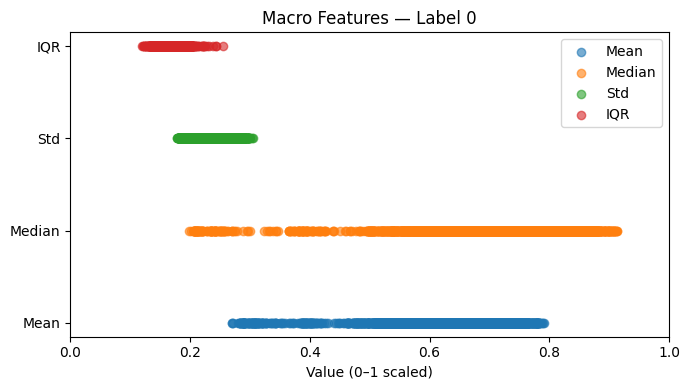

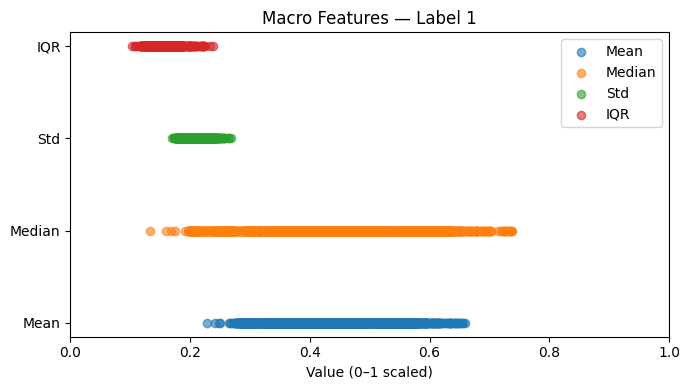

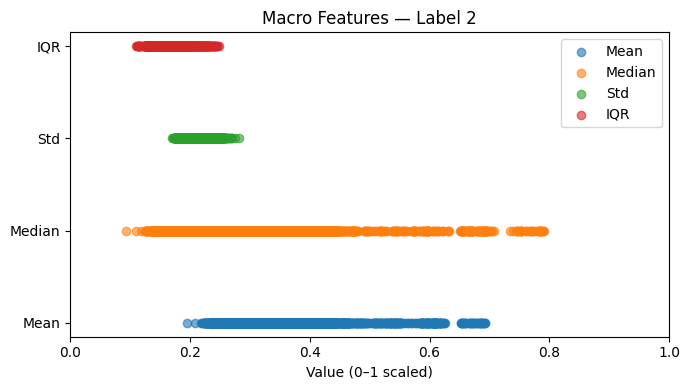

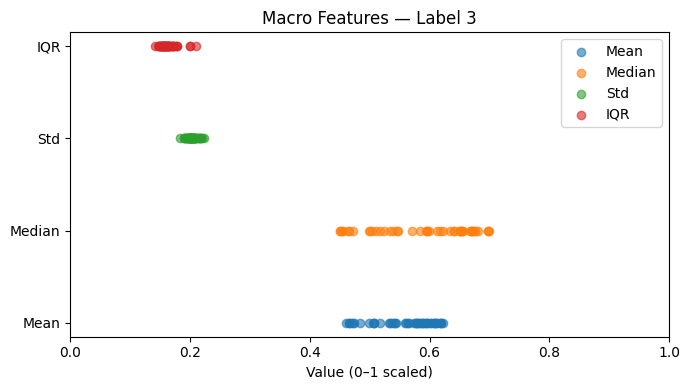

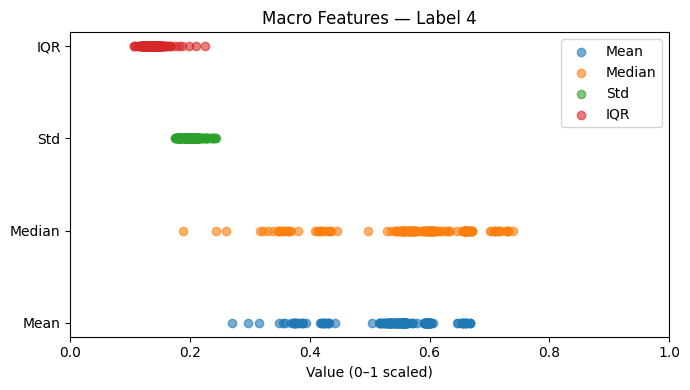

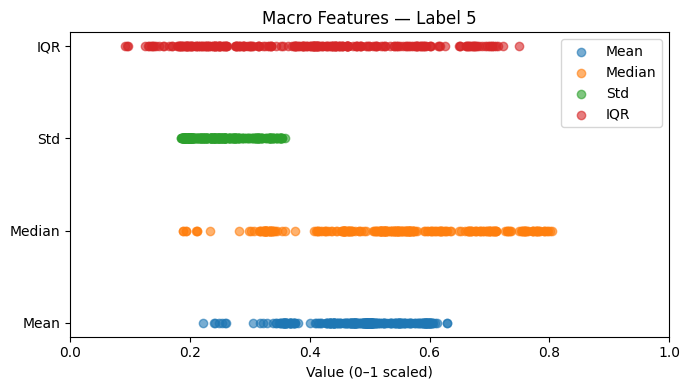

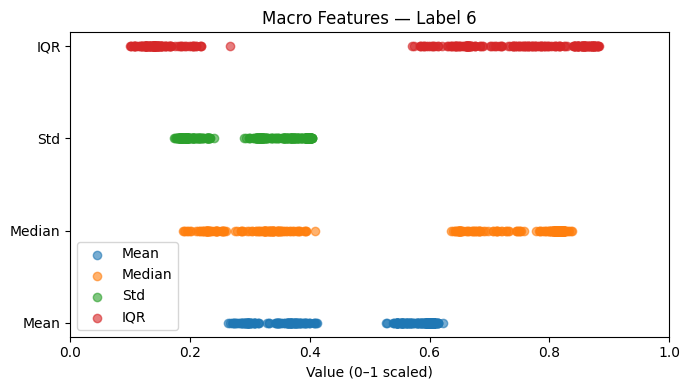

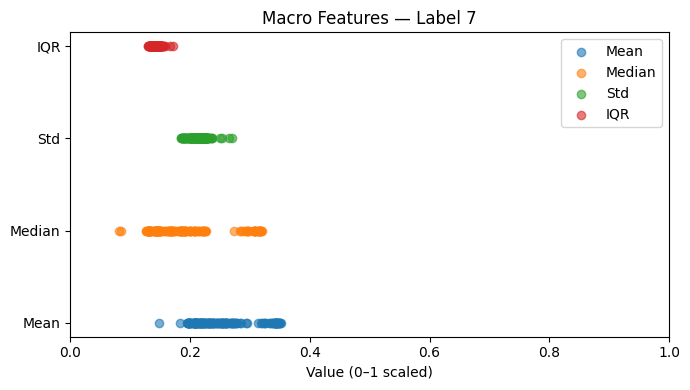

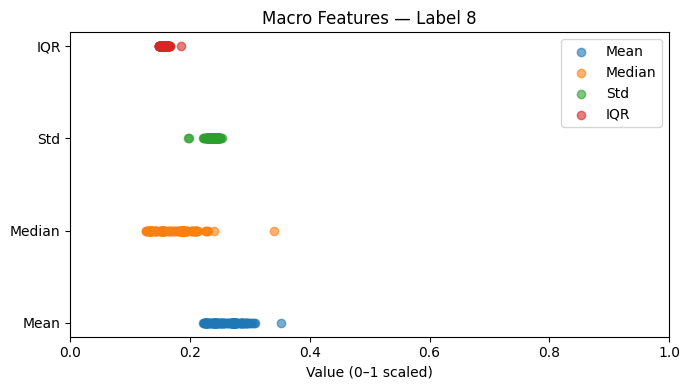

In [16]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
names  = ["Mean", "Median", "Std", "IQR"]

for label in range(num_classes):
    label_mask = ordered_labels == label
    X = macro_features[label_mask]

    plt.figure(figsize=(7, 4))

    for i in range(4):
        plt.scatter(
            X[:, i],
            np.full(X.shape[0], i),
            color=colors[i],
            alpha=0.6,
            label=names[i]
        )

    plt.xlim(0, 1)
    plt.yticks(range(4), names)
    plt.xlabel("Value (0–1 scaled)")
    plt.title(f"Macro Features — Label {label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

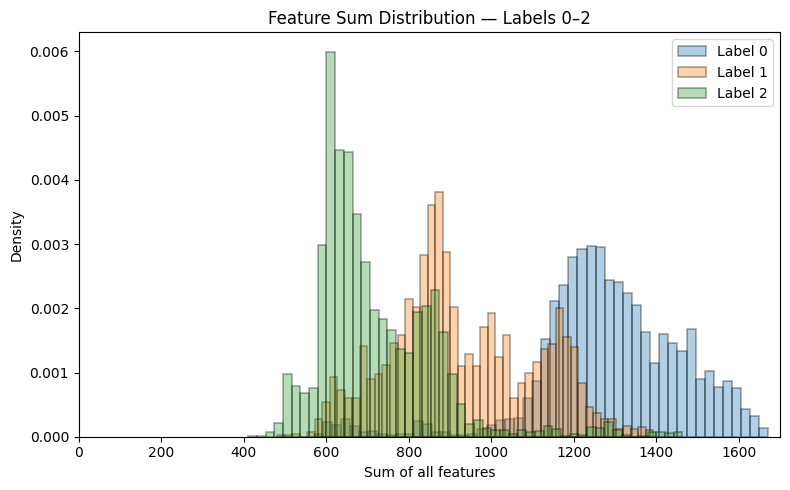

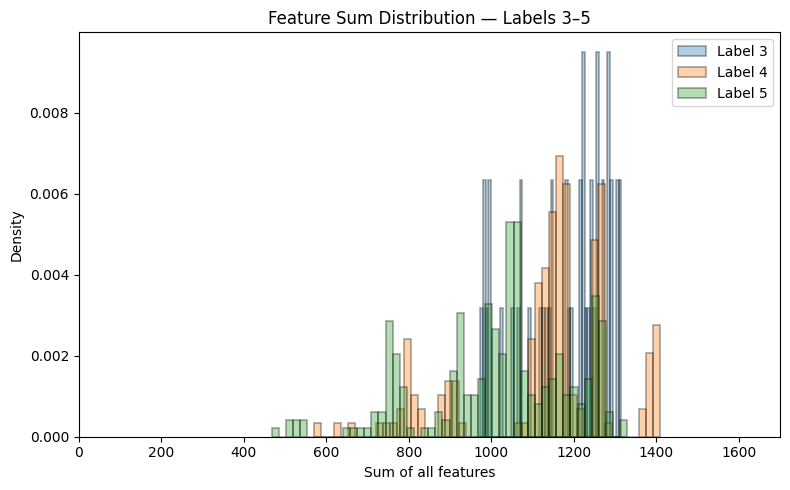

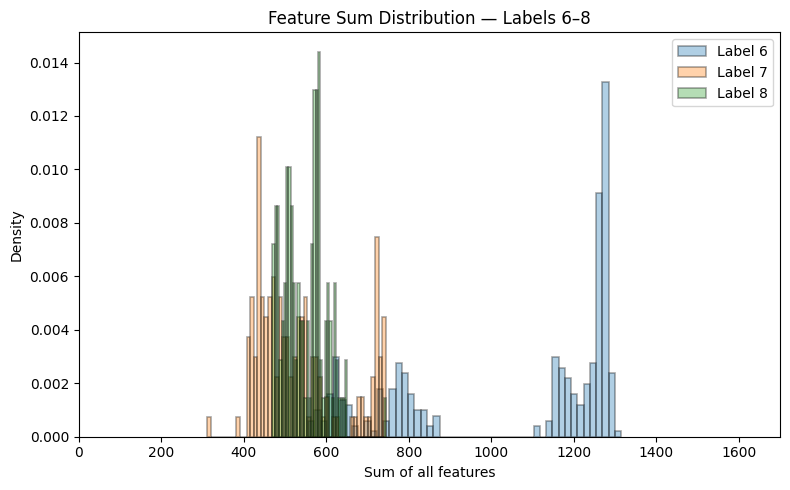

In [19]:
feature_sums = np.sum(ordered_data, axis=1)   # shape: (num_samples,)


for start_label in range(0, num_classes, 3):
    plt.figure(figsize=(8, 5))

    for label in range(start_label, start_label + 3):
        mask = ordered_labels == label
        plt.hist(
            feature_sums[mask],
            bins=50,
            alpha=0.35,
            edgecolor="black",
            linewidth=1.2,
            density=True,
            label=f"Label {label}"
        )

    plt.xlim(0, 1700)
    plt.xlabel("Sum of all features")
    plt.ylabel("Density")
    plt.title(f"Feature Sum Distribution — Labels {start_label}–{start_label+2}")
    plt.legend()
    plt.tight_layout()
    plt.show()